In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle


In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
##Preprocess The data
df.drop(columns=['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [5]:
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6884,639,France,Male,35,8,0.00,2,1,0,170483.90,0
9269,642,France,Male,35,4,125476.31,1,1,1,91775.51,0
9652,480,France,Female,40,7,0.00,1,1,0,170332.67,1
3548,770,Germany,Male,37,5,141547.26,2,0,1,180326.83,0


In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
## Encoder 
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe=OneHotEncoder()

In [13]:
geo_encoder=ohe.fit_transform(df[['Geography']])

In [14]:
ohe.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [15]:
geo_encoded_df=pd.DataFrame(geo_encoder.toarray(),columns=ohe.get_feature_names_out(['Geography']))

In [16]:
##Combine all the columns With The original Data
df=pd.concat([df.drop('Geography',axis=1),geo_encoded_df],axis=1)

In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [18]:
df.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [19]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [20]:
#Save The encoder and scaler
with open('lablel_encoder_gender.pkl','wb') as file :
    pickle.dump(label_encoder,file)
with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(ohe,file)

In [21]:
##Dive The dataset into dependent and independent feature 
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [22]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
scaler=StandardScaler()

In [27]:
X_train=scaler.fit_transform(X_train)

In [28]:
X_test=scaler.transform(X_test)

E:\anocanda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [29]:
with open('scaler.pkl','wb')as file:
    pickle.dump(scaler,file)

In [30]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_sampled,y_train_sampled=smote.fit_resample(X_train,y_train)

In [36]:
#ann implementation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard


In [37]:
X_train[1]

array([-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
        0.80843615,  0.64920267,  0.97481699,  1.6612541 , -0.99850112,
        1.72572313, -0.57638802])

In [88]:
model=Sequential([
    Dense(16,activation='relu',input_shape=(X_train.shape[1],)),##HL1 connected with inpoout layer
    Dense(8,activation='relu'),#H12
    Dense(1,activation='sigmoid')#Output layer    

]   
)

E:\anocanda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()

In [91]:
###Compile The  Model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [92]:
##SetUp The tensorboard
from datetime import datetime
from tensorflow.keras.callbacks  import EarlyStopping ,TensorBoard
log_dir="logs/fit"+datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)


In [93]:
##set up Early Stopping 
early_stoppping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [94]:
history=model.fit(X_train_sampled,y_train_sampled,validation_data=(X_test,y_test),epochs=100,
                  callbacks=[tensorflow_callback,early_stoppping_callback])

Epoch 1/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6621 - loss: 0.6111 - val_accuracy: 0.8035 - val_loss: 2567.5732
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7521 - loss: 0.5074 - val_accuracy: 0.8035 - val_loss: 4364.2871
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7728 - loss: 0.4725 - val_accuracy: 0.8035 - val_loss: 5800.0640
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7791 - loss: 0.4587 - val_accuracy: 0.8035 - val_loss: 6092.4346
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7787 - loss: 0.4514 - val_accuracy: 0.8035 - val_loss: 6381.6724
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7837 - loss: 0.4463 - val_accuracy: 0.8035 - val_loss: 4702.3652
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7863 - loss: 0.4419 - val_accuracy: 0.7955 - val_loss: 4408.3433
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7893 - lo

In [95]:
model.save('model.h5')

In [96]:
#Load Tensorflow Extensio
%reload_ext tensorboard

In [97]:
%tensorboard --logdir logs/fit20251211-174358

Reusing TensorBoard on port 6006 (pid 14820), started 0:19:16 ago. (Use '!kill 14820' to kill it.)

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
y_pred_probs=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


In [100]:
y_pred = (y_pred_probs > 0.5).astype(int)


In [101]:
cm=confusion_matrix(y_test,y_pred)

In [102]:
cm

array([[1607,    0],
       [ 393,    0]])

In [103]:
import seaborn as sns

<Axes: >

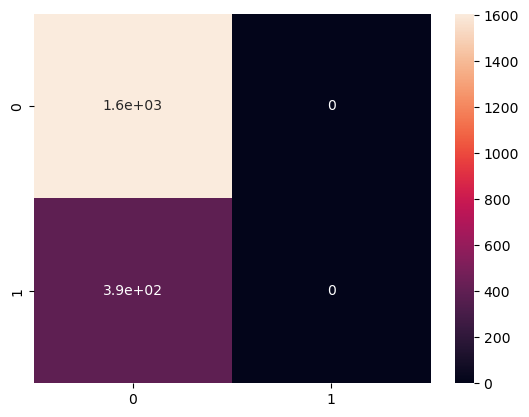

In [104]:
sns.heatmap(cm,annot=True)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test,y_pred)

0.8035